## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
Нам предстоит изучить рынок российского кинопроката и выявить текущие тренды. Отдельный вопрос - фильмы, которые получили государственную поддержку. Мы оценим, насколько такие фильмы интересны зрителю.
Исследование проводится на данных, опубликованных на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy
import warnings

warnings.filterwarnings("ignore")
numpy.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
df2 = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')
df.info()
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
df2['puNumber'] = df2['puNumber'].astype("string") # на данном этапе проще во втором датасете превратить формат в строковый, 
# а уже потом заняться исправлением пропусков, которые мешают превратить object в int.

df = df.merge(df2, on='puNumber', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   string 
 1   box_office  3158 non-null   float64
dtypes: float64(1), string(1)
memory usage: 49.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

В первую очередь, смущает, что номера прокатных удостоверений — в текстовом формате. 

In [9]:
df['puNumber'].sort_values()

804      111004112
3962     111000110
4768     111000111
729      111000112
1128     111000113
           ...    
4355     226017410
3992     226019110
1011     231001012
5249     231001111
1797           нет
Name: puNumber, Length: 7486, dtype: object

In [10]:
df.query('puNumber == "нет"') #нашлась одна строчка без номера прокатного удостоверения. Заменим "нет" на "0", чтобы изменить тип данных на числовой.
df['puNumber'] = df['puNumber'].str.replace("нет", "0")
df['puNumber'] = df['puNumber'].astype('int64') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Столбец show_start_date превращаем в формата datetime.

In [12]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [15]:
df['ratings'].unique() #часть данных содержит знак процентов, избавимся от них
df['ratings'] = df['ratings'].str.replace("%", "")
df.info()
df['ratings'] = df['ratings'].astype('float')
df['ratings'].unique()
df.loc[df['ratings'] >= 10.0, 'ratings'] = df.loc[(df['ratings'] >= 10.0), 'ratings'] / 10 #поделим бывшие процентные значения на 10
df['ratings'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.  


1. Пропуски в столбце со страной производства — 2 штуки. Ералашу точно можно присвоить "Россия". «Мульт личности» — сначала убедились, что такой "мульт" в датасете один, т.е. страну не списать у другого, но гугл говорит "Россия", заполним этим значением.

In [19]:
df.query('production_country.isna()') 
df[df['title'].str.contains("Мульт личности")]
df['production_country'] = df['production_country'].fillna("Россия")
df['production_country'].isna().sum()

0

С пропусками в других столбцах разобраться сложнее. Чаще всего приходится их оставить. Столбцы 9-12 про фильмы с гос.поддержкой изучать на пропуски и вовсе бесполезно: нет господдержки - нет значений в столбцах.

In [20]:
df.query('film_studio.isna()') #наверное, гуглить студию производства каждого из 16 фильмов - не путь аналитика. Оставляем NaN
df.query('director.isna()') #аналогично
df.query('producer.isna()').tail(20) #большинство фильмов - советские, но это не поможет нам с именами продюсеров. Оставляем
df['age_restriction'].unique() #без пропусков или дубликатов
df.query('ratings.isna()') #ну не гуглить же их все... ниже посмотрим, будет ли потребность заменить медианой по стране/жанру/году выпуска, но все эти опции кажутся нерелевантными
df.query('genres.isna()') #тоже не за что зацепиться для восстановления значений
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7486 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [21]:
df.duplicated().sum() # совсем идентичных строк в датасете нет

df[df['puNumber'].duplicated()]
df['puNumber'].value_counts() # два номера повторяются
df.query('puNumber == 221054410') # у фильмов различаются студии, страны, написание режиссера и продюсера, возрастное ограничение, рейтинг
df.query('puNumber == 221154310') # тут и вовсе разные фильмы
# можно было бы разобраться, не перепутан ли у какого-то из фильмов номер ПУ, что стало бы причиной появления дубликата, но поскольку 
# дубликатов всего 2, проще удалить их, так как особого влияния на статистику по датасету они не окажут
df = df.drop_duplicates(subset='puNumber').reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7484 non-null   object        
 1   puNumber               7484 non-null   int64         
 2   show_start_date        7484 non-null   datetime64[ns]
 3   type                   7484 non-null   object        
 4   film_studio            7466 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7475 non-null   object        
 7   producer               6916 non-null   object        
 8   age_restriction        7484 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Особый вызов — анализ дубликатов, в том числе неявных, в столбцах с сугубо текстовыми данными: именами собственными, названиями жанров.

In [22]:
df[df['title'].duplicated()]
df['title_lower'] = df['title'].str.lower()
df[df['title'].str.contains("Особо опасен")] #идентичны, хотя разные номера ПУ
df[df['title'].str.contains("Алекс и Эмма")] #проверил еще пару строк, всё везде идентично, кроме номера ПУ.  
df[df['title'].str.contains("Гарри Поттер")] # известно, что для проката в кинотеатре/выпуска DVD и т.д. выдаются разные ПУ
# резюме: оставляем эти строки, данные в порядке
df.info()

df['director'].unique()
df['director'] = df['director'].str.replace("С.Бондарчук", "Сергей Бондарчук", regex=False)
df['director'] = df['director'].str.replace("А.Кончаловский", "Андрей Кончаловский", regex=False)
df['director'] = df['director'].str.replace("А.Михалков-Кончаловский", "Андрей Кончаловский", regex=False)
df['director'] = df['director'].str.replace("А.Михалков (псевдоним Андрей Кончаловский)", "Андрей Кончаловский", regex=False)
df['director'] = df['director'].str.replace("А.Михалков", "Андрей Кончаловский", regex=False)
df['director'] = df['director'].str.replace("Н.Михалкова-Кончаловская", "Н.Михалкова", regex=False)
df['director'] = df['director'].str.replace("Тимур Бекмамбетов", "Т.Бекмамбетов", regex=False)
df['director'] = df['director'].str.replace("А.Тарковский", "Андрей Тарковский", regex=False)
df['director'] = df['director'].str.replace("Ролан Быков", "Р.Быков", regex=False)
df['director'].unique()
# список режиссёров примерно бесконечный и искать сокращенные и несокращенные написания можно пару ночей, но есть ли в этом смысл?
# тем более, что надо отделять однофамильцев по буквам имени


df['genres'].unique() # поскольку жанры представлены по несколько в одной строке, а не по отдельности, вновь тяжело придумать адекватный способ поиска неявных дубликатов и избавлений от них.
# даже фантастика и фэнтези, если верить гуглу, это разные жанры
# на глаз опечаток нет, идём дальше

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484 entries, 0 to 7483
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7484 non-null   object        
 1   puNumber               7484 non-null   int64         
 2   show_start_date        7484 non-null   datetime64[ns]
 3   type                   7484 non-null   object        
 4   film_studio            7466 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7475 non-null   object        
 7   producer               6916 non-null   object        
 8   age_restriction        7484 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [23]:
df['type'].unique() # лишний пробел в начале строки
df['type'] = df['type'].str.strip()
df['type'].unique()

df['title'].unique()
df['film_studio'].unique()
display(df['production_country'].nunique())
df['production_country'].unique() # тоже много пробелов, в т.ч. с разных сторон от "СССР"
df['production_country'] = df['production_country'].str.strip()
df['production_country'].nunique() #сократили набор стран на 16
# дальше остальные категориальные
df['director'].unique() # поиск по странице позволяет найти еще 5 пробелов в начале строк
display(df['director'].nunique())
df['director'] = df['director'].str.strip()
df['director'].nunique() # а в результате сократили на 9

df['producer'].unique()
display(df['producer'].nunique())
df['producer'] = df['producer'].str.strip()
df['producer'].nunique() # 15 значений превратились в повторяющиеся. мелочь, а приятно

df['age_restriction'].unique() # еще раз убеждаемся, что всё ок
df['financing_source'].unique() # всё ок, лишних пробелов нет
df['genres'].unique()  # лишних пробелов нет


950

4801

5348

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [24]:
df.query('budget < nonrefundable_support or budget < refundable_support') # есть 17 строк, в которых точно есть гос.поддерджка, но указан нулевой бюджет, который эту господдержку должен как минимум включать
# составим функцию для замены значений бюджета хотя бы суммой 2 типов поддержек, хотя бюджет может включать и средства из других источников

def budget_sum (row):
    nonrefund = row['nonrefundable_support']
    refund = row['refundable_support']
    budget = row['budget']
    if budget < (nonrefund + refund):
        budget = nonrefund + refund
    return budget
df['budget'] = df.apply(budget_sum, axis=1)
df.query('budget.notna()').head(50)
df.query('budget < nonrefundable_support or budget < refundable_support')  # проверил работу функции, всё ок

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,title_lower


count        245.00
mean     4420408.16
std      9579925.16
min            0.00
25%            0.00
50%            0.00
75%            0.00
max     50000000.00
Name: refundable_support, dtype: float64

count         245.00
mean     29521358.84
std      13698607.65
min             0.00
25%      25000000.00
50%      28000000.00
75%      35000000.00
max     138969465.00
Name: nonrefundable_support, dtype: float64

count         245.00
mean     63154686.02
std      28755853.06
min       6000000.00
25%      40015122.00
50%      55195000.00
75%      80000000.00
max     140005238.00
Name: budget, dtype: float64

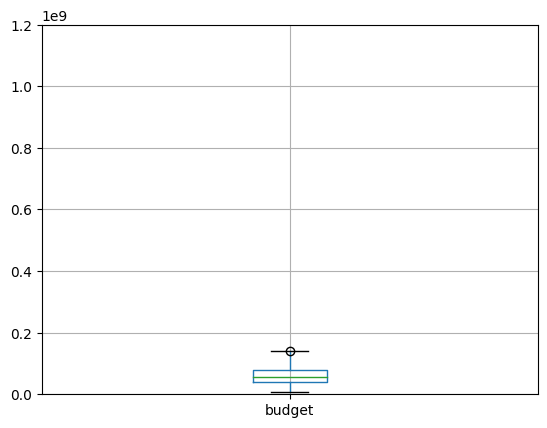

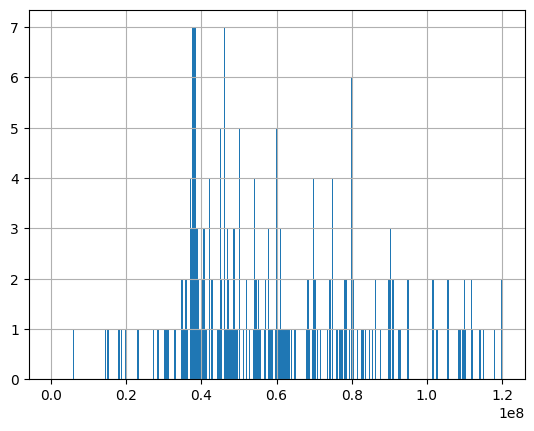

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7397 entries, 0 to 7396
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7397 non-null   object        
 1   puNumber               7397 non-null   int64         
 2   show_start_date        7397 non-null   datetime64[ns]
 3   type                   7397 non-null   object        
 4   film_studio            7379 non-null   object        
 5   production_country     7397 non-null   object        
 6   director               7388 non-null   object        
 7   producer               6830 non-null   object        
 8   age_restriction        7397 non-null   object        
 9   refundable_support     245 non-null    float64       
 10  nonrefundable_support  245 non-null    float64       
 11  budget                 245 non-null    float64       
 12  financing_source       245 non-null    object        
 13  rat

In [26]:
display(df['refundable_support'].describe())
display(df['nonrefundable_support'].describe())
display(df['budget'].describe()) # стандартное отклонение в 3 раза выше медианного значения, странно
df.boxplot(column='budget')
plt.ylim(0, 1200000000)
plt.show()
df['budget'].hist(bins=329, range=(0,120000000)) 
plt.show()
# в столбце бюджет есть одно значение (2,3 млрд), неадекватно превышающее все остальные (максимум - 120 млн), без него похожие на нормальное распределение.
# удалим это значение и прочие выбросы (более 75% по describe)
df = df.loc[(df['budget'] < 140025000) | (df['budget'].isna())].reset_index(drop=True)
df.info()

count         3073.00
mean      68322833.35
std      219674378.18
min              0.00
25%          75850.00
50%        2128955.00
75%       19808355.60
max     2576613776.83
Name: box_office, dtype: float64

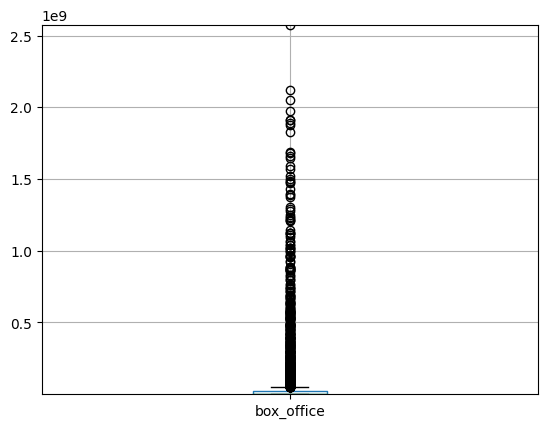

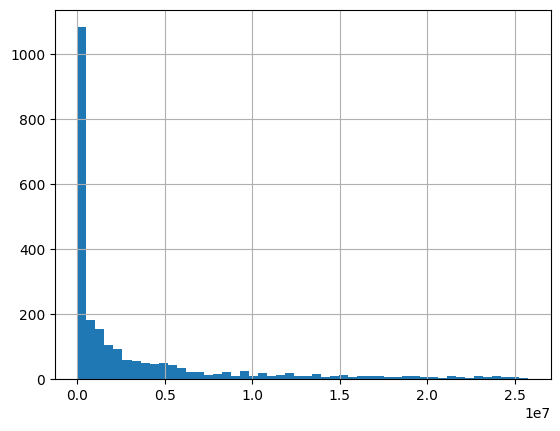

0.00            24
200.00          13
300.00          12
360.00           9
400.00           8
                ..
9585014.00       1
809638458.60     1
220728.00        1
11332412.00      1
52984377.00      1
Name: box_office, Length: 2853, dtype: int64

In [27]:
display(df['box_office'].describe()) # очень большие стандартное отклонение и разница среднего и медианы
df.boxplot(column='box_office')
plt.ylim(1, 2576613777)
plt.show()

df['box_office'].hist(bins=50, range=(0,25766137)) 
plt.show()

df['box_office'].value_counts()
# это всё выглядит странно, но успехи фильмов статистически трудно предсказуемы, плюс, как я понял из комментариев коллег,
# некоторые данные по ПУ и сборам относятся к DVD,а не только показам в кинотеатрах.
# думаю, можно данные оставить в таком виде

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [28]:
df['year'] = pd.DatetimeIndex(df['show_start_date']).year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [29]:
df['main_director'] = df['director'].str.split(",").str[0] #пожалуй, так проще, чем через функцию
df['main_genre'] = df['genres'].str.split(",").str[0]
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,title_lower,year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,открытый простор,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,особо важное задание,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Т.Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,особо опасен,2016,Т.Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Т.Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,особо опасен,2016,Т.Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Т.Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,особо опасен,2015,Т.Бекмамбетов,фантастика
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7392,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,сад художника: американский импрессионизм,2019,Фил Грабски,NaN
7393,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN,звериная ярость,2019,Ник Пауэлл,боевик
7394,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,щенячий патруль: скорей спешим на помощь!,2019,Чарльз Е.Бастьен,NaN
7395,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"машины песенки. серия ""испанские мотивы""",2019,А.Беляев,NaN


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [31]:
df['support_rate'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']
df.query('support_rate.notna()').head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,title_lower,year,main_director,main_genre,support_rate
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,пока еще жива,2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,37142857.00,Министерство культуры,NaN,NaN,28140.00,бесславные придурки,2014,А.Якимчук,NaN,0.70
1523,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,40574140.00,Министерство культуры,4.20,драма,55917.50,берцы,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1791,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,40015122.00,Министерство культуры,6.40,драма,232100.00,братья ч,2014,М.Угаров,драма,0.62
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,...,51850000.00,Министерство культуры,6.10,"мультфильм,фэнтези,история",15078858.60,тайна сухаревой башни. чародей равновесия,2015,С.Серегин,мультфильм,0.48
1869,Две женщины,111013714,2014-10-02 12:00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.00,...,86210067.00,"Министерство культуры, Фонд кино",6.70,драма,4731239.50,две женщины,2014,В.Глаголева,драма,0.54
1901,Призрак_.,111001815,2015-03-02 12:00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,...,139551503.00,Фонд кино,7.00,"триллер,боевик,приключения",352804320.40,призрак_.,2015,А.Войтинский,триллер,0.54
1910,Ведьма .,111002215,2015-03-05 12:00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,...,48571430.00,Министерство культуры,7.40,"фэнтези,приключения,драма",51907.50,ведьма .,2015,Д.Федоров,фэнтези,0.70
1985,Елки Лохматые,111023114,2014-12-10 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+» - для детей старше 6 лет,26000000.00,...,80000000.00,Фонд кино,5.00,"семейный,комедия",121225633.80,елки лохматые,2014,Максим Свешников,семейный,0.70
1989,Смайлик,111008614,2014-08-08 12:00:00,Художественный,"ООО ""Продюсерская кинокомпания ""Киномир""",Россия,Т.Аленикова,Т.Яковенко,«16+» - для детей старше 16 лет,0.00,...,36259500.00,Министерство культуры,6.80,мелодрама,554251.00,смайлик,2014,Т.Аленикова,мелодрама,0.69


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

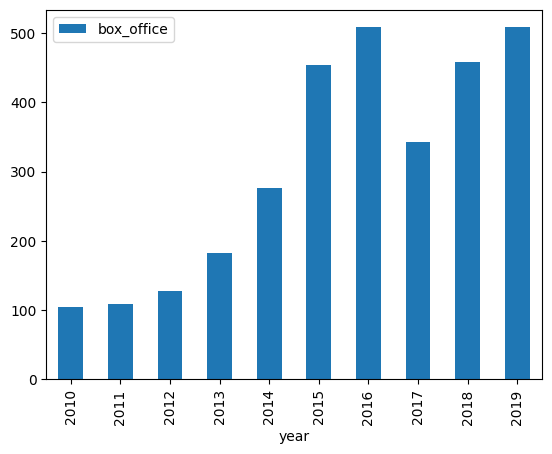

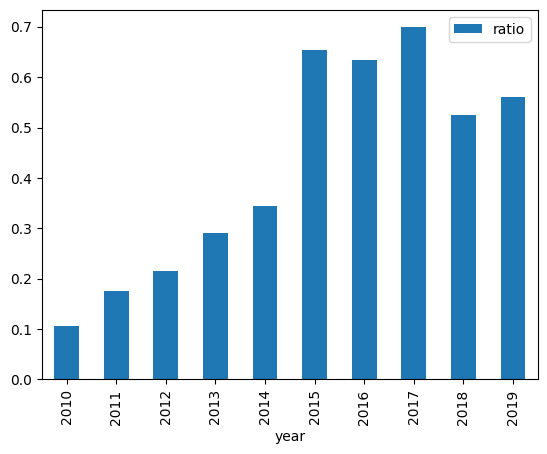

In [32]:
box_office_years = df.pivot_table(index='year', values=['box_office', 'title'], aggfunc='count')
box_office_years['ratio'] = box_office_years['box_office'] / box_office_years['title']

box_office_years.plot(y='box_office', kind='bar')
box_office_years.plot(y='ratio', kind='bar')
plt.show()

От 2010 к 2019 количество фильмов, выходивших в прокат в кинотеатрах, стабильно (и иногда кратно) росло, однако их доля достигла пика в 2015-2017 гг., после чего немного снизилась.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

,sum,mean,median
,box_office,box_office,box_office
year,,,
2010,2428654.00,23130.04,1700.00
2011,14102765.00,129383.17,3000.00
2012,6955423.00,54339.24,5660.00
2013,9842674.70,53785.11,3500.00
2014,7043341971.60,25427227.33,18115.00
2015,37397201082.37,82372689.61,4742671.67
2016,43198926818.93,85037257.52,3436747.45
2017,38416012906.51,112000037.63,9024725.00


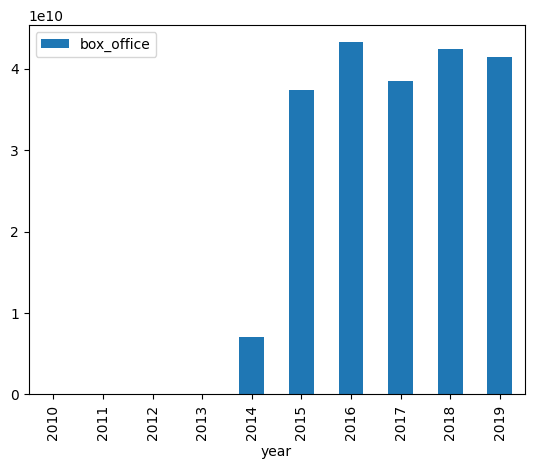

In [33]:
box_office_dyn = df.pivot_table(index='year', values=['box_office'], aggfunc=['sum', 'mean', 'median'])
#box_office_dyn.sort_values(by='box_office')
display(box_office_dyn)
box_office_dyn.plot(y='sum', kind='bar')
plt.show()

Видим, что кассовые сборы в кинотеатрах резко растут с 2014 года, когда количество выходящих в прокат фильмов превысило 200. Суммы до 2013 года настолько малы в сравнении с 2014-2019, что даже не видны на графике.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

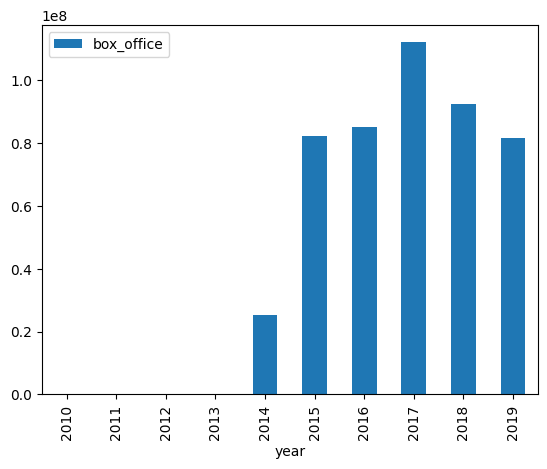

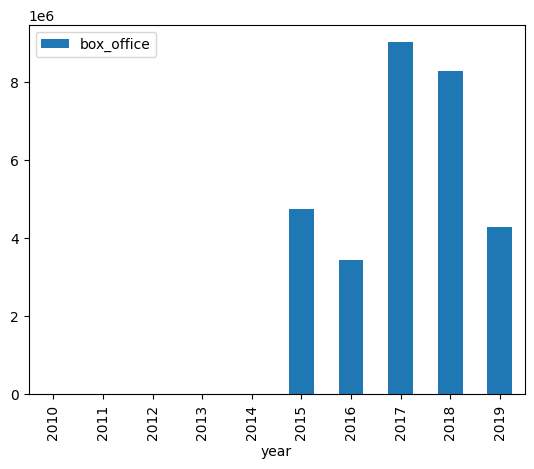

In [34]:
# сводную таблицу посчитал одну на общую сумму, среднюю и медианную в предыдущей ячейке, здесь визуализирую
box_office_dyn.plot(y='mean', kind='bar')
box_office_dyn.plot(y='median', kind='bar')
plt.show()

Медианные значения по каждому году существенно ниже (даже графики строятся в числах 1e6 против 1e8), что может объясняться отдельными успехами в прокате отдельных фильмов, за счет которых растёт среднее значение, но общий уровень сборов остается условно посредственным.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [35]:
box_office_age = df.pivot_table(index=['year', 'age_restriction'], values=['box_office'], aggfunc=['sum'])
box_office_age = box_office_age.query('year >= 2015')
display(box_office_age)

films_2015 = df.query('year == 2015 and age_restriction == "«12+» - для детей старше 12 лет"')
display(films_2015['box_office'].describe())
films_2015.sort_values(by='box_office', ascending=False).head()

sum
                                                box_office
year age_restriction                                      
2015 «0+» - для любой зрительской аудитории   379054578.37
     «12+» - для детей старше 12 лет        12842524702.11
     «16+» - для детей старше 16 лет        11354632533.97
     «18+» - запрещено для детей             5432308367.44
     «6+» - для детей старше 6 лет           7388680900.48
2016 «0+» - для любой зрительской аудитории   150228848.67
     «12+» - для детей старше 12 лет         9942370202.53
     «16+» - для детей старше 16 лет        16218106595.42
     «18+» - запрещено для детей             6793929818.87
     «6+» - для детей старше 6 лет          10094291353.44
2017 «0+» - для любой зрительской аудитории    23120744.00
     «12+» - для детей старше 12 лет         4119931137.67
     «16+» - для детей старше 16 лет        17890368616.06
     «18+» - запрещено для детей             9651495581.02
     «6+» - для детей старше 6 лет           6731096827.76
2018 «0+» - для любой зрительской аудитории    32449002.11
     «12+» - для детей старше 12 лет         8607752534.84
     «16+» - для детей старше 16 лет        16502795335.46
     «18+» - запрещено для детей             8703727520.59
     «6+» - для детей старше 6 лет           8543183035.13
2019 «0+» - для любой зрительской аудитории    17746066.82
     «12+» - для детей старше 12 лет         8259276903.38
     «16+» - для детей старше 16 лет        12151135201.23
     «18+» - запрещено для детей            10028607606.51
     «6+» - для детей старше 6 лет          11020581384.03

count           70.00
mean     183464638.60
std      345647826.53
min              0.00
25%         179572.75
50%       14700223.40
75%      294252223.33
max     1658861425.50
Name: box_office, dtype: float64

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,title_lower,year,main_director,main_genre,support_rate
3101,Звёздные войны: Пробуждение силы,121024915,2015-12-11 12:00:00,Художественный,"Лукасфилм, Бэд Робот, Трунорт Продакшнз",США,Джей Джей Абрамс,"Джей Джей Абрамс, Брайан Берк, Кэтлин Кеннеди",«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,7.10,"фантастика,боевик,приключения",1658861425.50,звёздные войны: пробуждение силы,2015,Джей Джей Абрамс,фантастика,NaN
2154,Мстители: Эра Альтрона,121007215,2015-04-03 12:00:00,Художественный,Марвел Студиос,США,Джосс Уидон,Кевин Фейги,«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,7.20,"фантастика,боевик,приключения",1500989281.90,мстители: эра альтрона,2015,Джосс Уидон,фантастика,NaN
2571,Мир Юрского периода,121006515,2015-04-03 12:00:00,Художественный,"Эмблин Интертейнмент, Леджендари Пикчерз, Юнив...",США,Колин Треворроу,"Патрик Краули, Фрэнк Маршалл",«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,6.90,"фантастика,приключения,боевик",1211158990.00,мир юрского периода,2015,Колин Треворроу,фантастика,NaN
2502,Терминатор: Генезис,121012415,2015-06-11 12:00:00,Художественный,"Парамаунт Пикчерз, Скайдэнс Продакшнз",США,Алан Тэйлор,"Дэвид Эллисон, Дэна Голдберг",«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,6.40,"фантастика,боевик,триллер",1060054283.00,терминатор: генезис,2015,Алан Тэйлор,фантастика,NaN
2591,Эверест (2015),121012815,2015-06-23 12:00:00,Художественный,"Кросс Крик Пикчерз, Фри Стейт Пикчерз, Эр Вэ К...",США,Бальтазар Кормакур,"Ники Кентиш Барнс, Тим Беван, Лиза Чейсин",«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,7.20,"боевик,триллер,драма",630550647.80,эверест (2015),2015,Бальтазар Кормакур,боевик,NaN


Из получившейся сводной таблицы видим, что в 2015 году самые большие кассовые сборы у фильмов "12+", во всех последующих годах - у "16+". Стабильно высокие показатели у фильмов "6+", чего нельзя сказать про "0+", но, скорее всего, таких фильмов просто мало.  
При изучении фильмов "12+", вышедших в 2015 году, видим, что очень большую их долю (больше 25%) составляют фильмы, чьи сборы почти в 2 раза превышают среднее значение. Возможно, именно это объясняет, что в этом году "12+" обогнали "16+" по сборам.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [36]:
gos_sup = df.query('refundable_support.notna() or nonrefundable_support.notna()')
gos_sup['total_support'] = gos_sup['refundable_support'] + gos_sup['nonrefundable_support']
gos_sup['total_support'].describe()

count         245.00
mean     33941767.00
std      15785982.17
min       3000000.00
25%      25000000.00
50%      30000000.00
75%      40000000.00
max     138969465.00
Name: total_support, dtype: float64

Видим, что средний размер господдержки составляет почти 34 млн рублей, медианный - ровно 30 млн рублей. 

In [37]:
gos_sup['box_office'].describe()

count         233.00
mean     45278343.28
std     101292873.25
min          1550.00
25%        636264.00
50%       4731239.50
75%      33005527.30
max     683029061.40
Name: box_office, dtype: float64

При этом, средние кассовые сборы фильмов с господдержкой - 45 млн рублей. Выглядит, словно это выше размера поддержки, а значит дело можно назвать прибыльным. Но, во-первых, медиана по кассовым сборам таких фильмов - меньше 5 млн рублей, а значит, большинство фильмов не окупаются. Во-вторых, бюджет может быть больше, чем размер господдержки. Посмотрим на данные по бюджету.

In [39]:
gos_sup['budget'].describe()

count         245.00
mean     63154686.02
std      28755853.06
min       6000000.00
25%      40015122.00
50%      55195000.00
75%      80000000.00
max     140005238.00
Name: budget, dtype: float64

Средний бюджет фильмов с господдержкой - больше 63 млн рублей. И даже медианные 55 с небольшим млн рублей превышают средние кассовые сборы аж на 10 млн рублей. Уже очевидно, что фильмы с господдержкой не окупаются. Сколько же из них всё-таки окупается?

In [40]:
good_gos_sup = gos_sup.query('budget <= box_office')
display(good_gos_sup['ratings'].describe())
display(gos_sup['ratings'].describe())
display(df['ratings'].describe())

count   45.00
mean     5.84
std      0.96
min      3.90
25%      5.10
50%      5.90
75%      6.60
max      7.80
Name: ratings, dtype: float64

count   231.00
mean      5.98
std       1.10
min       1.00
25%       5.30
50%       6.10
75%       6.65
max       9.40
Name: ratings, dtype: float64

count   6432.00
mean       6.49
std        1.11
min        1.00
25%        5.90
50%        6.60
75%        7.20
max        9.90
Name: ratings, dtype: float64

Окупилось всего 45 фильмов с господдержкой, что составляет примерно 25% от общего числа таких фильмов. И даже у этих фильмов рейтинг не превышает 7.8, а в среднем составляет 5.8-5.9, что не выглядит как "восторг публики".  
Общий же средний рейтинг фильмов с господдержкой даже чуть выше: 5.98, несмотря на неокупаемость большинства. А максимальный и вовсе 9.4.  При этом, фильмы с господдержкой уступают 0,5 балла среднему и медианному рейтингу по всем фильмам исходного датафрейма.  
Резюме: расходование государственных средств на поддержку кино вызывает некоторые вопросы.

### Шаг 5. Напишите общий вывод

Итак, выводы. Исходные датафреймы были неоднородны, некоторое данные в них пропущены и восстановлению не подлежат (в т.ч. кассовые сборы по половине одного из первичных датафреймов).  
Тем не менее я соединил два датафрейма в один, изменил типы данных где это было нужно, обработал пропуски (что выглядело менее осуществимо), сократил некоторое количество дубликатов, в т.ч. в категориальных значениях, в которых часто встречались лишние пробелы в началах и концах строк. В результате предобработки исходный датафрейм сократился примерно на 9%.

Я смог выяснить, что с 2010 по 2017 наблюдался рост количества фильмов, выходивших в прокат в кинотеатрах, в том числе кратный. Доля таких фильмов к общему числу фильмов в датафрейме тоже росла. 
Логично, что вместе с количеством фильмов росли и кассовые сборы. Здесь вновь пик был достигнут в 2017 году, после чего пошел некоторый спад, если судить по средним и медианным значениям. При этом медианные значения на порядок ниже, что может свидетельствовать об успехах в прокате отдельных фильмов, но в среднем (не в математическом смысле слова) показатели фильмов и, вероятно, прибыль кинотеатров оставляют желать лучшего.

Анализ распределения кассовых сборов по возрастным ограничениям показал, что больше всего денег собирают фильмы с пометкой "16+" (кроме 2015 года). Это может объясняться тем, что кинотеатры популярны прежде всего у подростков 14-18 лет и молодежи, а проверка соответствия возрастному цензу может не всегда происходить корректно и дотошно. 

Отдельная глава анализа посвящена фильмам с государственной поддержкой. Здесь всё очень грустно: и рейтинги, и кассовые сборы, и размеры поддержки свидетельствуют, что фильмы с гос.поддержкой не окупаются, а их качество вызывает вопросы.